<a href="https://colab.research.google.com/github/casselscott/Food-crop-Image-Identification/blob/main/Deep_Learning_Food_crop_Image_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identification of Food Crops using a multi class Classification**

**Problem:** Identifying a crop type given an image of a food crop.

**Data:** The data used for this project is gotten from kaggle https://www.kaggle.com/datasets/yudhaislamisulistya/plants-type-datasets

**Evaluation:** I want to be able to evaluate the probability for each food crop type using a test image.

Information about the data

I will be using Images (Unstructured data) so deep learning is best suited for this solution.

There are a total of 1000 images for the training dataset and 25 food crop classes. This means that there are 25 different types of food crops present in the 1000 images.

There is a also a total of 1000 images for the test data as well as 25 food crop classes.

In [1]:
#importing Tensor flow and tensor flow hub

import tensorflow as tf
import tensorflow_hub as hub

#check the version of tensor flow and tensor flow hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

#check if GPU is available
print ("GPU","available (Yes!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.14.0
Hub version: 0.15.0
GPU available (Yes!)


Getting the data ready: Turning the data to tensors:

In [3]:
#Lets explore the data labels with panda

import pandas as pd
crop_labels=pd.read_csv("/content/drive/MyDrive/Food Crops/croplabels.csv")
print (crop_labels.describe())
print (crop_labels.head())

                 id    labels
count           988       988
unique          988        25
top     croplabel0   cucumber
freq              1        47
            id    labels
0  croplabel0   aloevera
1   croplabel1  aloevera
2   croplabel2  aloevera
3   croplabel3  aloevera
4   croplabel4  aloevera


<Axes: >

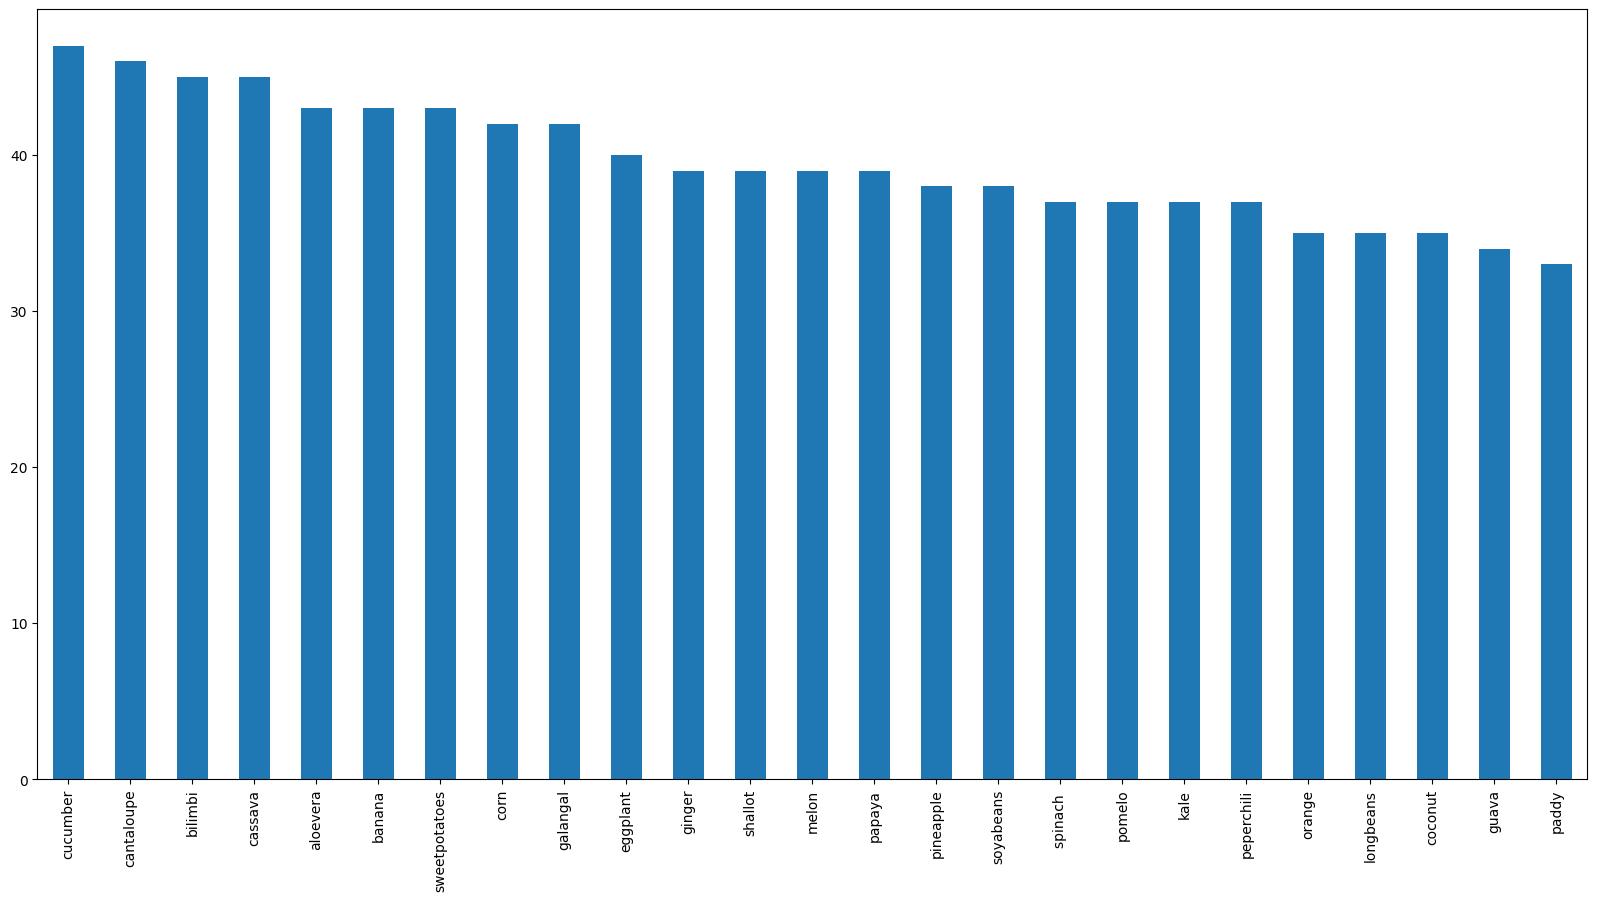

In [4]:
#How many images are there in each of the food crops

crop_labels["labels"].value_counts().plot.bar (figsize=(20,10))

In [5]:
#mean of the food crops Which is the average number of images in the columns
crop_labels["labels"].value_counts().median()

39.0

Preparing the images for for Exploratory Data Analysis

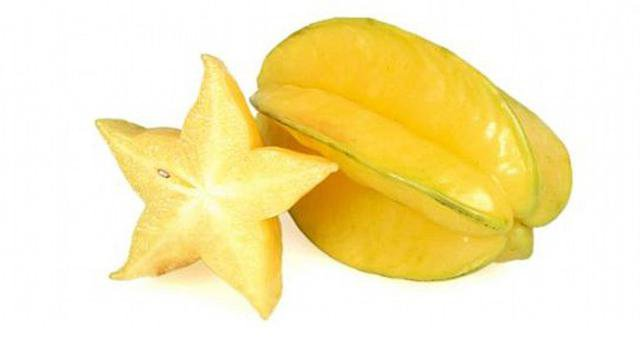

In [8]:
#Let's view an image from the dataset

from IPython.display import display, Image
Image ("/content/drive/MyDrive/Food Crops/foodcrops/croplabel110.jpg")


In [9]:
#Getting the images and their labels

#Let's get a list of all images file pathnames

crop_labels.head()

,id,labels
0,croplabel0,aloevera
1,croplabel1,aloevera
2,croplabel2,aloevera
3,croplabel3,aloevera
4,croplabel4,aloevera


In [59]:
#Create pathnames from Image ID's
filenames = ["/content/drive/MyDrive/Food Crops/foodcrops/" + fname +".jpg" for fname in crop_labels['id']]

#check the first 10

filenames[:20]

['/content/drive/MyDrive/Food Crops/foodcrops/croplabel0 .jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel1.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel2.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel3.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel4.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel5.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel6.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel7.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel8.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel9.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel10.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel11.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel12.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel13.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/croplabel14.jpg',
 '/content/drive/MyDrive/Food Crops/foodcrops/cro

In [11]:
#Check that the number of files names matches the number of image files

import os
if len(os.listdir("/content/drive/MyDrive/Food Crops/foodcrops/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [12]:
len(filenames)

988

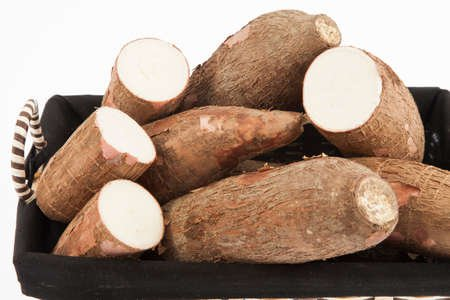

In [13]:
#Double check if we are visualising from the right path

Image(filenames[200])

Turning labels into Numbers.

Since we have gotten the training data in a file path, lets prepare the labels

In [14]:
import numpy as np

foodcrop_labels=crop_labels["labels"].to_numpy()
foodcrop_labels [:20]

array(['aloevera', 'aloevera', 'aloevera', 'aloevera', 'aloevera',
       'aloevera', 'aloevera', 'aloevera', 'aloevera', 'aloevera',
       'aloevera', 'aloevera', 'aloevera', 'aloevera', 'aloevera',
       'aloevera', 'aloevera', 'aloevera', 'aloevera', 'aloevera'],
      dtype=object)

In [15]:
#check the length
len(foodcrop_labels)

988

In [16]:
#Check if the labels matches the number of filesnames

if len(foodcrop_labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


**Since machine learning cannot take strings, we would have to convert them to numbers.**

In [17]:
#Find the unique label values

unique_foodcrop=np.unique(foodcrop_labels)
unique_foodcrop

array(['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava',
       'coconut', 'corn', 'cucumber', 'eggplant', 'galangal', 'ginger',
       'guava', 'kale', 'longbeans', 'melon', 'orange', 'paddy', 'papaya',
       'peperchili', 'pineapple', 'pomelo', 'shallot', 'soyabeans',
       'spinach ', 'sweetpotatoes'], dtype=object)

In [18]:
#Check the length of the unique labels

len(unique_foodcrop)

25

In [19]:
#Turn a single label into an array of booleans
print(foodcrop_labels[0])

foodcrop_labels[0] == unique_foodcrop

aloevera


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [21]:
#Turn every label into a boolean array
boolean_foodcroplabels = [foodcroplabel == np.array(unique_foodcrop) for foodcroplabel in foodcrop_labels]
boolean_foodcroplabels [:2]



[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False])]

In [22]:
len(boolean_foodcroplabels)

988

In [23]:


from pandas.core.arrays import boolean
#Turning the boolean arrays into integers

print(foodcrop_labels[0]) # original label
print(np.where(unique_foodcrop == foodcrop_labels[0])) # index where label occurs
print(np.argmax(boolean_foodcroplabels[0]))
print(boolean_foodcroplabels[0].astype(int))



aloevera
(array([0]),)
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
#lets try for different index
print(foodcrop_labels[920])
print(boolean_foodcroplabels[920].astype(int))

spinach 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [25]:
#Creating a validation dataset from the training data
#Setting up X and Y variables

X=filenames
Y=boolean_foodcroplabels
len(filenames)

988

In [26]:
#Set the number of images to use for experimenting

NUM_IMAGES=988 #@param {type:"slider", min:100, max:988, step:100}

**Spiltting the data into train and Validation sets**

In [27]:
from pandas._libs.tslibs.offsets import YearEnd
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_IMAGES],
                                                  Y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(Y_train), len(X_val), len(Y_val)

(790, 790, 198, 198)

In [28]:
#Exploring the training dataset
X_train[:5], Y[:2]

(['/content/drive/MyDrive/Food Crops/foodcrops/croplabel878.jpg',
  '/content/drive/MyDrive/Food Crops/foodcrops/croplabel215.jpg',
  '/content/drive/MyDrive/Food Crops/foodcrops/croplabel306.jpg',
  '/content/drive/MyDrive/Food Crops/foodcrops/croplabel49.jpg',
  '/content/drive/MyDrive/Food Crops/foodcrops/croplabel891.jpg'],
 [array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False]),
  array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False])])

From the above dataset we can see that the X_train contains the file paths and the Y_train contains the Food crops labels

**Preprocessing the Images**

Preprocessing the images involves turning the images into tensors.

A function will be written to do the following task:

1. Take an image file path as an input
2. Use Tensorflow to read the file and save it to a Variable called "Image"
3. Turn the image (which is currently in a jpg format) into tensors
4. Normalize our image, Which is convert colour channel values (RGB) from 0-255 to 0-1
5. Resize the image to be a shape of (224,224).
6. Return the modified image.

In [29]:
#Convert an image to numpy
from matplotlib.pyplot import imread
image=imread(filenames[30])
image.shape
image.max(), image.min()

(255, 0)

In [30]:
#Turn into a tensor

tf.constant(image)[:5]

<tf.Tensor: shape=(5, 722, 3), dtype=uint8, numpy=
array([[[119, 120,  88],
        [124, 125,  93],
        [124, 125,  93],
        ...,
        [125, 107,  97],
        [122, 104,  94],
        [122, 104,  94]],

       [[115, 116,  84],
        [120, 121,  89],
        [121, 122,  90],
        ...,
        [128, 110, 100],
        [124, 106,  96],
        [124, 106,  96]],

       [[110, 109,  78],
        [115, 114,  83],
        [117, 116,  85],
        ...,
        [131, 113, 103],
        [127, 109,  99],
        [127, 109,  99]],

       [[106, 105,  74],
        [112, 111,  80],
        [114, 113,  82],
        ...,
        [134, 116, 106],
        [129, 111, 101],
        [129, 111, 101]],

       [[104, 103,  72],
        [110, 109,  78],
        [113, 112,  81],
        ...,
        [136, 118, 108],
        [131, 113, 103],
        [131, 113, 103]]], dtype=uint8)>

Basically, what this means when converted to tensors is that, the images can be run on the GPU.

**Creating a function to preprocess all of the data to tensors**

In [31]:
#Define Image size
IMG_SIZE=224

#Creating a function to preprocess images
def foodcrop_process_image(image_path):
  """
   Takes an image file path and turns the image into a tensor
  """
 # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

**Turning the Data into Batches**

The reason for turning our data into batches is because if we are trying to process all 988 Images at one go they would not fit into memory. So that's why i will be using 32 to process the images.

In order to use tensorflow effectively, we need our data in the form of tensor tuples which will look like this : (Image, label):

In [32]:
#Creating a function to return a tuple of tensors

def get_image_foodcroplabel(image_path, label):

     """
     Takes an image file path name and the associated food crop label, processes the image and returns a type of (image, label)

     """
     image=foodcrop_process_image(image_path)
     return image,label


In [33]:
#Turning both images and crop labels into tensors

(foodcrop_process_image(X[35]),(Y[35]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.40739673, 0.6212973 , 0.25311625],
         [0.41865376, 0.60927874, 0.24992998],
         [0.5028624 , 0.65309   , 0.31076682],
         ...,
         [0.08868911, 0.2959286 , 0.03547651],
         [0.12558654, 0.3190827 , 0.09268201],
         [0.15631919, 0.34847605, 0.13278978]],
 
        [[0.3821166 , 0.59666485, 0.23132874],
         [0.39006516, 0.58637995, 0.22987607],
         [0.44198307, 0.60113907, 0.26166075],
         ...,
         [0.12234575, 0.32757208, 0.04239183],
         [0.12857121, 0.32303897, 0.0918502 ],
         [0.1383485 , 0.32546344, 0.11197419]],
 
        [[0.37114838, 0.5880689 , 0.23231785],
         [0.3805939 , 0.5819156 , 0.23354392],
         [0.40015954, 0.56937027, 0.23401208],
         ...,
         [0.12690252, 0.3295343 , 0.0407548 ],
         [0.1275737 , 0.3195556 , 0.08447989],
         [0.12565038, 0.30684513, 0.09181809]],
 
        ...,
 
        [[0.43223494, 0.52573115

Now we have got a way to turn our data into tuples of tensors in the form: (image,label)

Creating a function to turn all the data (X and Y) into batches.

In [34]:
#Define the batch size

BATCH_SIZE=32

#Creating a function to turn data into batches

def create_foodcropdata_batches(X,Y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X)and label (Y) pairs. shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Accepts test data as input (no labels)

  """
  #if the data is a test dataset, we won't have labels.
  if test_data:
    print("Creating test data batches...")

    #This will convert only the images in X to tensors
    data=tf.data.Dataset.from_tensor_slices ((tf.constant(X)))
    data_batch=data.map(foodcrop_process_image).batch(BATCH_SIZE)
    return data_batch

    #if the data is a valid dataset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(Y))) # labels
    data_batch = data.map(get_image_foodcroplabel).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(Y))) # labels
        #Shuffling pathnames and labels before mapping image
    data = data.shuffle(buffer_size=len(X))

  #Creating (Image, label) tuple which will turn the image path into a preprocessed image)
    data = data.map(get_image_foodcroplabel)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [35]:
#Creating a training and validation data batches with the function

train_data=create_foodcropdata_batches(X_train, Y_train)
val_data=create_foodcropdata_batches(X_val,Y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [43]:
val_data=create_foodcropdata_batches(X_val,Y_val, valid_data=True)
len(val_data)

Creating validation data batches...


7

In [36]:
#Check out the attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 25), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 25), dtype=tf.bool, name=None)))

The output above shows the labels paired with the image sie of 224

**Visualising the Data Batches**

In [37]:
#import matplotlib
import matplotlib.pyplot as plt

#Creating a function for viewing images in a data batch

def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch

  """
  #setting up the figure
  plt.figure(figsize=(10,10))

  #We also want to loop through the 25 images
   # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_foodcrop[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

**Visualising the images from the data batch**

In [38]:
train_images, train_labels = next(train_data.as_numpy_iterator())

<Figure size 1000x1000 with 0 Axes>

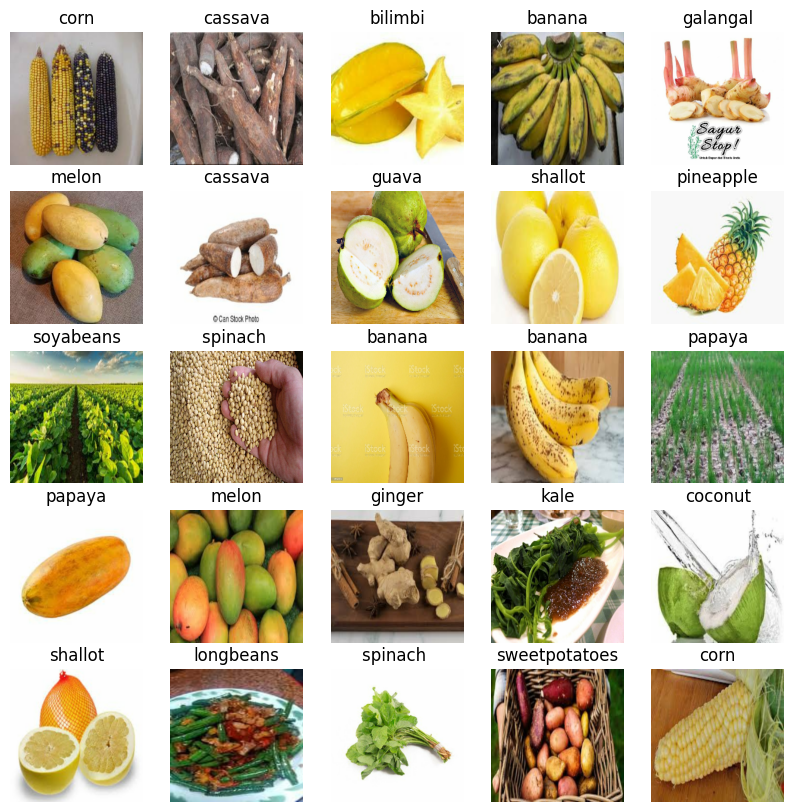

In [39]:
show_25_images(train_images, train_labels)

In [45]:
val_images, val_labels = next(train_data.as_numpy_iterator())

<Figure size 1000x1000 with 0 Axes>

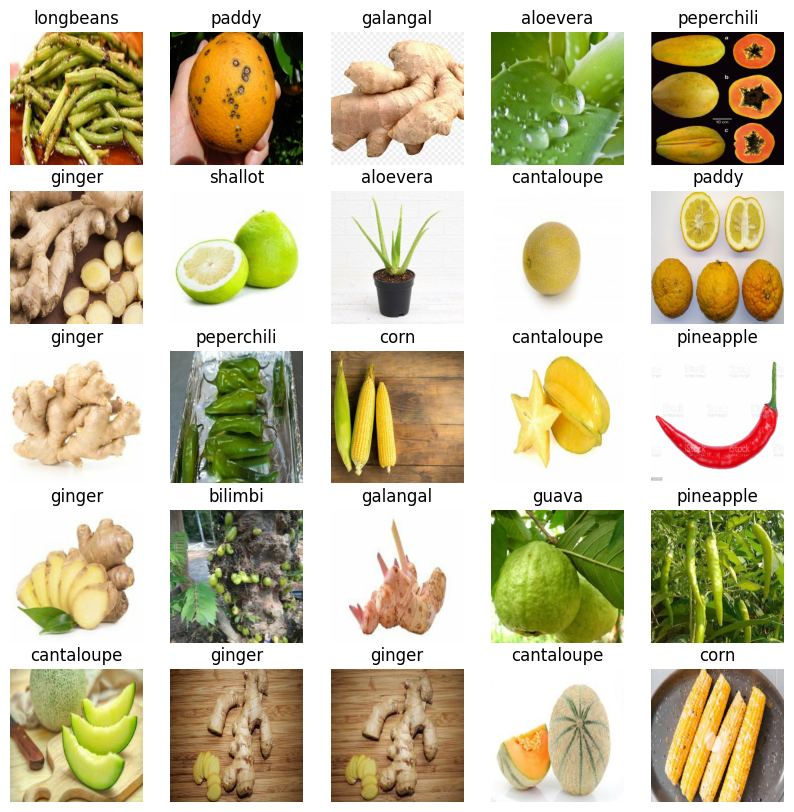

In [46]:
show_25_images(val_images, val_labels)

**PREPARING OUR INPUTS AND OUTPUTS**

Building a deep learning Model

Inputs - Keras Deep learning Model - to derive an output

Since it is a multi class image classifcation we would need to define a few things:

1. The input shape (the images, is in the form of tensors) to the model.

2. The output shape(image labels, is also in the form of tensors) of the model.

3. The URL of the model we would be using is:
  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [47]:
#Setup input shape
INPUT_SHAPE=[None, IMG_SIZE,IMG_SIZE,3]

#Setup the output shape of the model
OUTPUT_SHAPE= len(unique_foodcrop)

#Setup model URL
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Putting it all together in a function into a keras deep learning model.
The Keras flow API is used for building and training deep learning models.

1. Creating a function thats takes the input shape, outshape shape and the model we have chosen as parameters.

2. Defines the layers in a keras model in sequential order.(Basically, do this first, and then the next)

3. Compile the model

4. Build the model

5. Returns the model

In [48]:
#creating a function which builds a keras model

def create_foodcrop_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [49]:
model=create_foodcrop_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 25)                25050     
                                                                 
Total params: 5457763 (20.82 MB)
Trainable params: 25050 (97.85 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


**Summarising the model**

Imagnet is a large database of over 14,000,000 images that has been used to find patterns to train our own dataset.

**Evaluating the Model**

Creating callbacks which are helper functions can be used to check the progress, save progress, or the model if its stops improving.

I will create two callbacks, one for tensorboard which helps track our models and another for early stopping which prevents our model from obverfitting

In [50]:
from keras.src.callbacks import TensorBoard
#Load Tensor board notebook extension

%load_ext tensorboard

**Tensor Board Callback**

I want to setup a tensor board callback and i need to do the following:

1. Load the tensor board notebook extension

2. Create a Tensorboard callback which is able to save logs to a directory and pass it to the model's function()

3. Visualise the models training logs with the tensbor board function

In [51]:

#Create a function to for tensorboard callback
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Food Crops/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

 **Preventing Overfitting**

Creating an early stopping callback, so that if it trains for too long it will stop improving.

Early stopping will help prevent the model from overfitting. (This will stop training when a certain evaluation metrics stops improving

In [52]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

**Training the Deep Neutral Network**

#Training the model on the train data

Number of epochs is how many parse we want the model to do

In [56]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:20, step:5}

In [53]:
#Final check to make sure the GPU is still running
#check if GPU is available
print ("GPU","available (Yes!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (Yes!)


Creating a function which trains a model

The function is going to do the following:

1. Create a model using the create_foodcrop_model()

2. Setup a Tensorboard callback using the function created create_tensorboard_callback()

3. call the fit () on the model passing it the training data, number of epochs to train for (NUM_EPOCHS) as well as the callbacks we would like to use.

4. Return the model.

In [54]:
#Build a function to train and return a trained model

def train_foodcrop_model():
  """
  Trains a given model and returns the trained version
  """
  #create a model
  model= create_foodcrop_model()

   # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model